In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import statistics
from statistics import mode
from statsmodels import robust
from dmba.featureSelection import stepwise_selection
from dmba import metric
from sklearn.metrics import mean_squared_error, r2_score



# Load the data frame 

In [2]:
#loading the data
Data=pd.read_csv('train.csv')


# structure of the data frame.

In [3]:
#checking for the dimension of the dataset
Data.shape

(1460, 81)

In [4]:
Data.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [5]:
Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#Dropping ID AND TARGET COLUMNS FROM DATA FRAME
target=Data["SalePrice"]
Data.drop(["Id","SalePrice"],inplace=True, axis = 1)

In [7]:
# Viewing some basic statistical details like percentile, mean, std etc, using Pandas describe() function
Data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


Obsereved that Pandas describe() function just returns back the statistical details for numeric features. 

It can be seen that there is a big difference between the mean value and std for the numerical features such as  'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'. Also the minimum value, as well the value of  25%, 50%, 75% quartiles for these features are equal zero. We can conclude that the observations for these features are outliers. As it can be observed, these columns do not have any missing values!!! 

# Finding the missing values

Missing values are the most common issue with any data science project. 
Most of the machine learning algorithms are not able to handle missing values. Thus, these missing values must be addressed before applying any machine learning algorithm. 

Missing values can be handled in different ways depending on if the missing values are continuous or categorical. So we first separet the numeric and categorical features. Then we try to count the number of missing values in each columns. 

It would be better to sort the columns in descending order in order to see the columns with highest missing values.

In [8]:
#extracting numeric and categorical columns
Data_numeric = Data.select_dtypes(include='number')
Data_categorical= Data.select_dtypes(include='object')



In [9]:
#getting numerical columns with the missing values in descending order.
Data_numeric.isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
YrSold             0
BsmtFinSF2         0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
TotalBsmtSF        0
BsmtUnfSF          0
BsmtFinSF1         0
BsmtFullBath       0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
GrLivArea          0
BsmtHalfBath       0
MoSold             0
WoodDeckSF         0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
GarageArea         0
FullBath           0
GarageCars         0
Fireplaces         0
TotRmsAbvGrd       0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
MSSubClass         0
dtype: int64

It is seen that two features "LotFrontage" and "GarageYrBlt" have nearrly 18% and 5.5% , respectively, missing values. These missing values might be better to be replaced by the value of mean or median and std etc.

In [10]:
#getting categorical columns with the missing values in descending order.
Data_categorical.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
GarageCond         81
GarageQual         81
GarageFinish       81
GarageType         81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
MasVnrType          8
Electrical          1
Condition2          0
Condition1          0
Neighborhood        0
LandSlope           0
BldgType            0
LandContour         0
LotConfig           0
Utilities           0
RoofStyle           0
LotShape            0
Street              0
HouseStyle          0
SaleCondition       0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
Foundation          0
SaleType            0
Heating             0
HeatingQC           0
CentralAir          0
KitchenQual         0
Functional          0
PavedDrive          0
MSZoning            0
dtype: int64

In [11]:
#Gettin % of missing values in each column by divideing by length of the data frame.
Data_numeric.isnull().sum().sort_values(ascending=False)/len(Data_numeric)

LotFrontage      0.177397
GarageYrBlt      0.055479
MasVnrArea       0.005479
YrSold           0.000000
BsmtFinSF2       0.000000
LowQualFinSF     0.000000
2ndFlrSF         0.000000
1stFlrSF         0.000000
TotalBsmtSF      0.000000
BsmtUnfSF        0.000000
BsmtFinSF1       0.000000
BsmtFullBath     0.000000
YearRemodAdd     0.000000
YearBuilt        0.000000
OverallCond      0.000000
OverallQual      0.000000
LotArea          0.000000
GrLivArea        0.000000
BsmtHalfBath     0.000000
MoSold           0.000000
WoodDeckSF       0.000000
MiscVal          0.000000
PoolArea         0.000000
ScreenPorch      0.000000
3SsnPorch        0.000000
EnclosedPorch    0.000000
OpenPorchSF      0.000000
GarageArea       0.000000
FullBath         0.000000
GarageCars       0.000000
Fireplaces       0.000000
TotRmsAbvGrd     0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
MSSubClass       0.000000
dtype: float64

In [12]:
#Gettin % of missing values in each column by divideing by length of the data frame.

Data_categorical.isnull().sum().sort_values(ascending=False)/len(Data_categorical)


PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
GarageCond       0.055479
GarageQual       0.055479
GarageFinish     0.055479
GarageType       0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtQual         0.025342
BsmtCond         0.025342
MasVnrType       0.005479
Electrical       0.000685
Condition2       0.000000
Condition1       0.000000
Neighborhood     0.000000
LandSlope        0.000000
BldgType         0.000000
LandContour      0.000000
LotConfig        0.000000
Utilities        0.000000
RoofStyle        0.000000
LotShape         0.000000
Street           0.000000
HouseStyle       0.000000
SaleCondition    0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
SaleType         0.000000
Heating          0.000000
HeatingQC        0.000000
CentralAir  

In [13]:
#Viewing the basic statistical details of Categorical features using Pandas describe() function.
Data_categorical.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


Obsereved that some columns like Alley, PoolQC, MiscFeature, Fence, have extremly large missing values, nearly 80%.FireplaceQu has nearly 50% missing values. These columns might be better to remove from the dataset, since they are not infromative. 

# Dealing with missing values

1- Deleting the column with missing data

2- Filling the Missing Values – Imputation:
  
     * Filling the missing data with the mean or median value, median absolute deviation etc if         it’s a numerical variable.
     * Filling the missing data with mode if it’s a categorical value.
     **???????Filling the numerical value with 0 or -999, or some other number that will not      occur in the data. This can be done so that the machine can recognize that the data 
     is not real or is different.


In [14]:
#filling the missing values in numeric columns with median absolute deviation
rows=Data.shape[0]
for col in Data_numeric:
    if Data_numeric[col].isnull().sum()> (0.25 * rows):
        Data_numeric=Data_numeric.drop(col, axis=1)
    else:     
        replacement_value= robust.mad(Data_numeric.loc[Data_numeric[col].notnull(), col], c=1)
        Data_numeric[col].fillna(replacement_value, inplace=True ) 
Data_numeric.isnull().sum().sum() 

C:\Anaconda\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0

In [15]:
#filling the missing values in categorical columns with mode

for col in Data_categorical.columns:
    if Data_categorical[col].isnull().sum()>(0.25 * rows):
            Data_categorical=Data_categorical.drop(col,axis=1)
    else:
        dropped = Data_categorical[col].dropna()
        Data_categorical[col]=Data_categorical[col].fillna(mode(dropped)) 

        
Data_categorical.isnull().sum().sum()    

<ipython-input-15-de582505c7c2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_categorical[col]=Data_categorical[col].fillna(mode(dropped))


0

# Data visualization 

# Scatter plot

Scatter plot is a graph in which the values of two variables are plotted along two axes. It is a most basic type of plot that helps you visualize the relationship between two variables

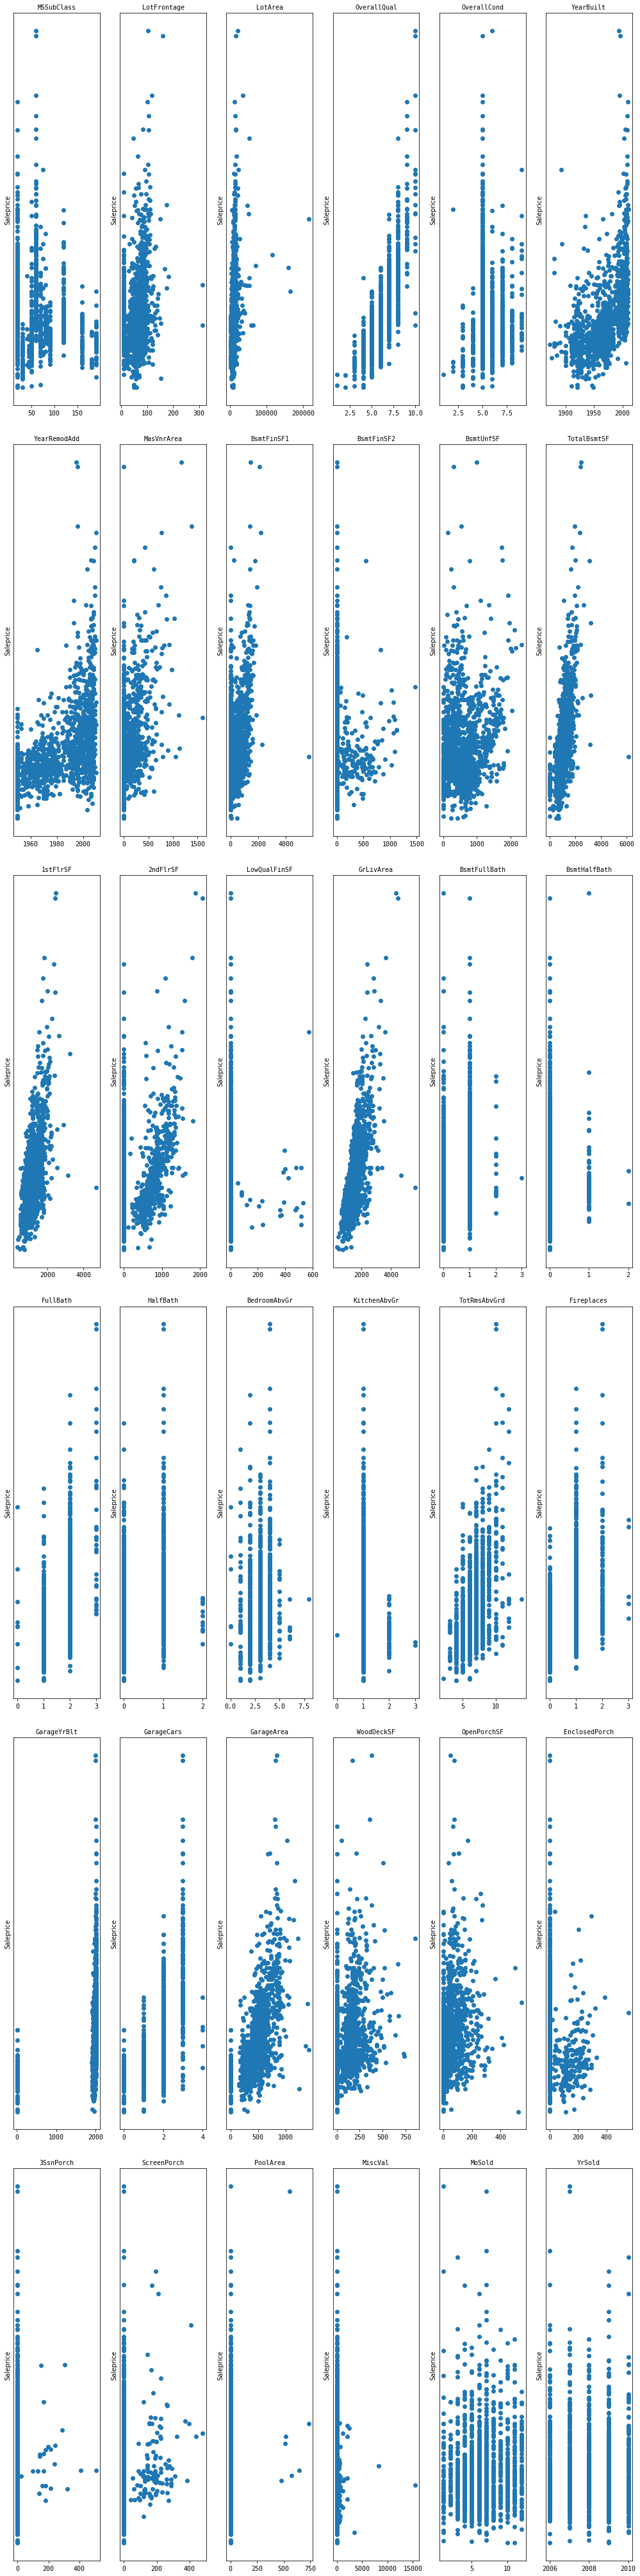

In [16]:
fig = plt.figure(figsize = (14, 56)) 
for i in range(len(Data_numeric.columns.tolist())): 
    plt.subplot(6,6,i+1)   
    plt.title(Data_numeric.columns.tolist()[i], size = 10, fontname = 'monospace')   
    a = plt.scatter(x=Data_numeric[Data_numeric.columns.tolist()[i]], y=target)  
    plt.ylabel('Saleprice')   
    plt.xlabel('')   
    plt.xticks(fontname = 'monospace')   
    plt.yticks([])   

fig.tight_layout(h_pad = 3) 
plt.show()

# Boxplot

A box plot is a statistical representation of the distribution of a variable through its quartiles. The ends of the box represent the lower and upper quartiles, while the median (second quartile) is marked by a line inside the box.

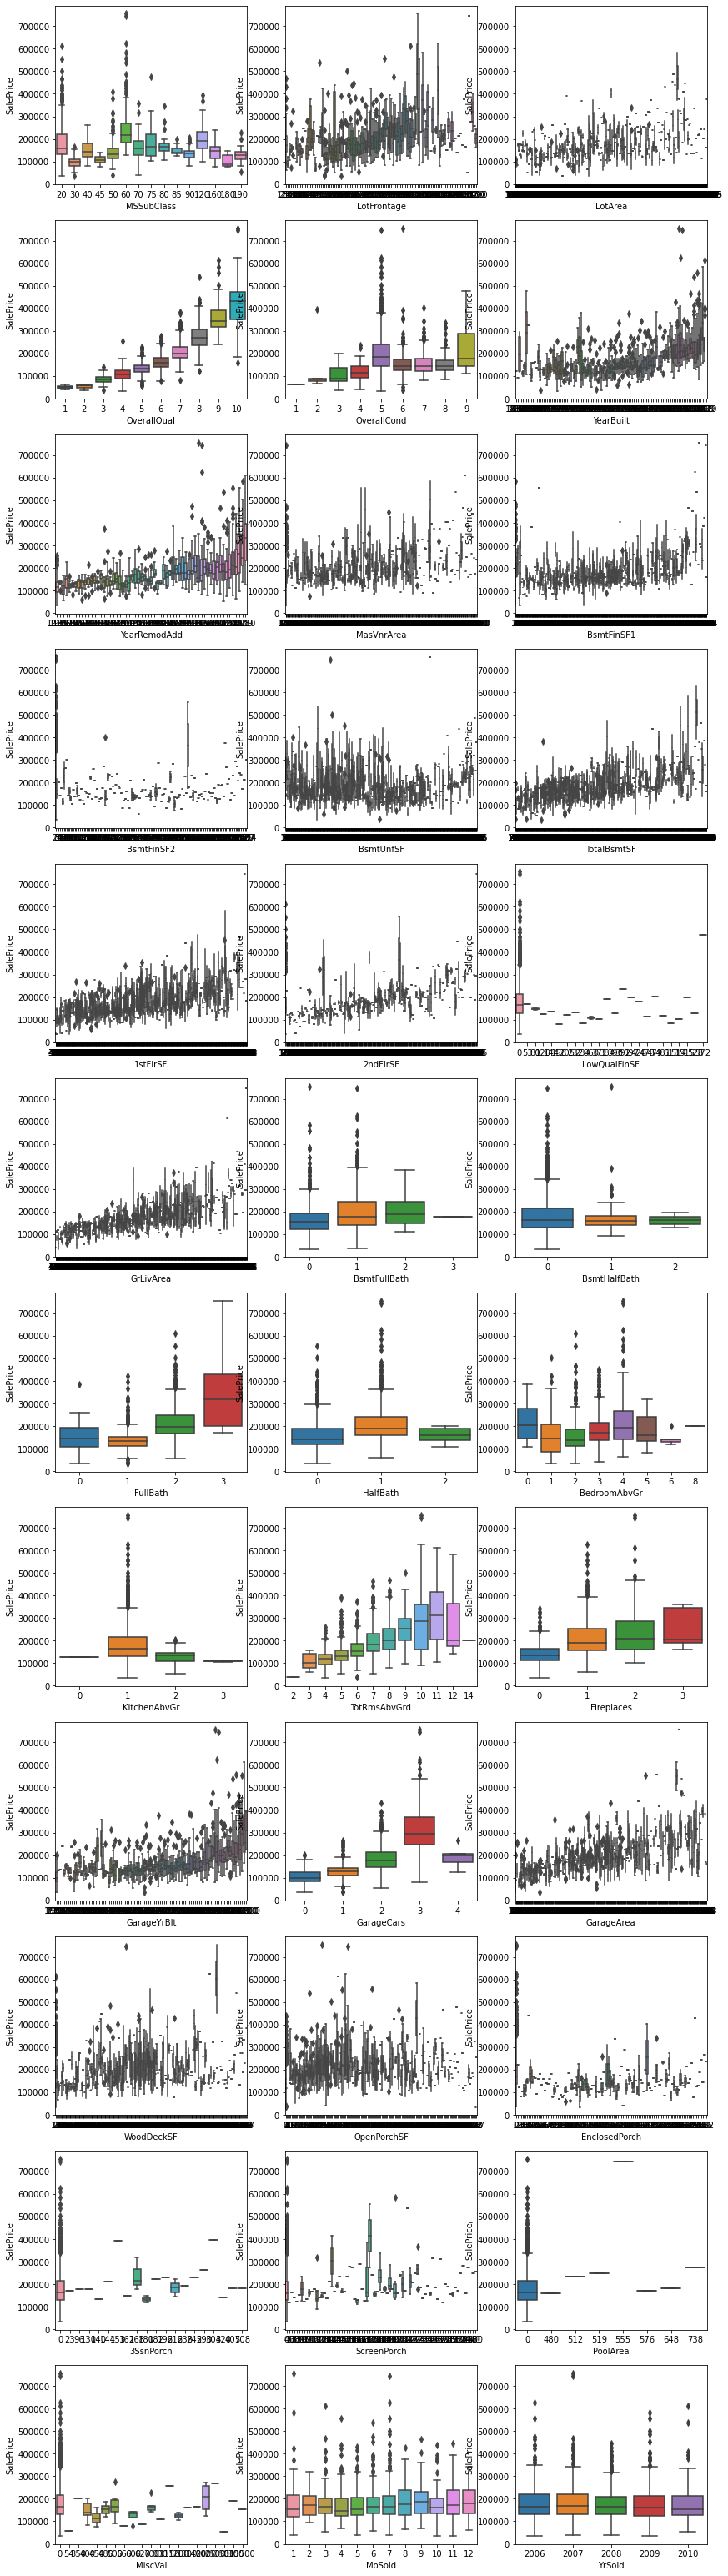

In [17]:
lenght=len(Data_categorical.columns.tolist())
fig = plt.figure(figsize = (14, 56)) 
      
for i in range(len(Data_numeric.columns.tolist())): 
        plt.subplot(12,3,i+1)   
        sns.boxplot(data=Data, x=Data_numeric[Data_numeric.columns.tolist()[i]], y=target)     
    

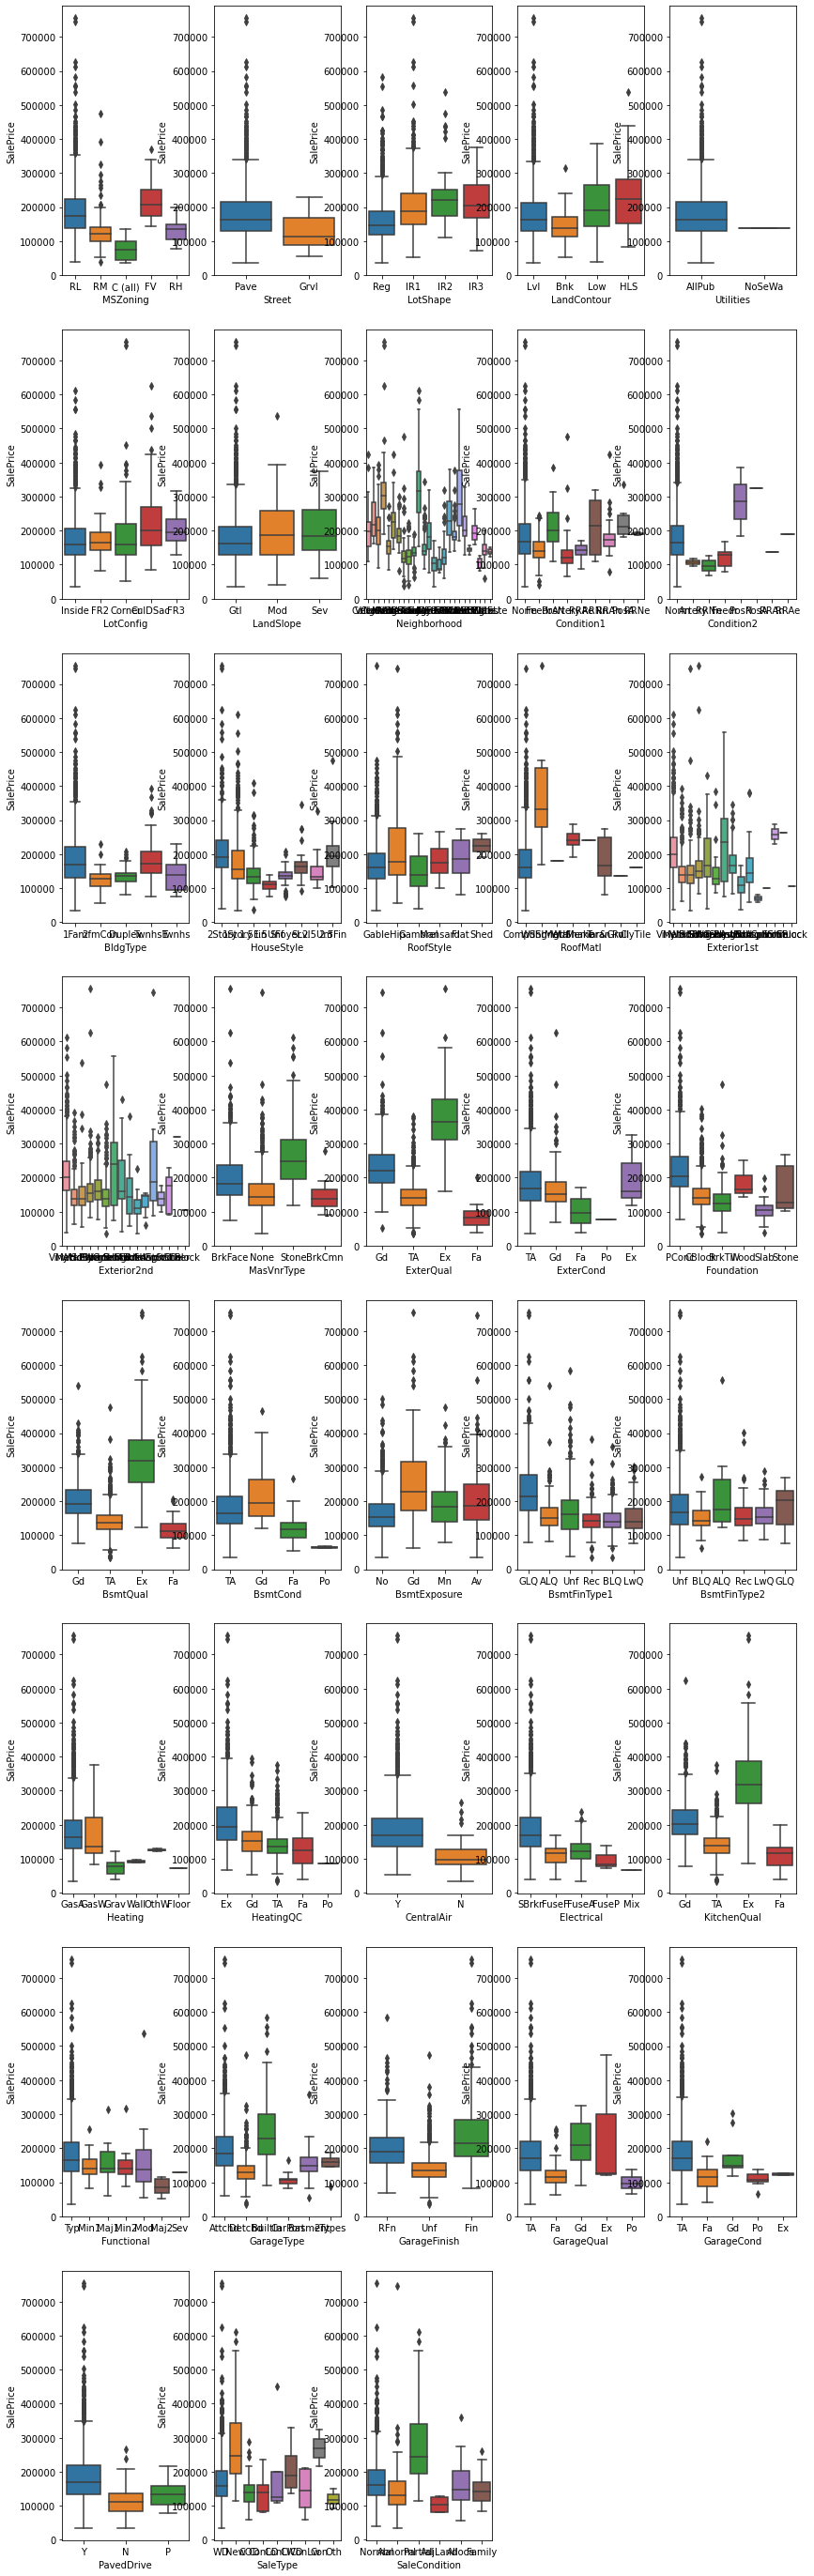

In [18]:
lenght=len(Data_categorical.columns.tolist())
fig = plt.figure(figsize = (14, 56)) 
      
for i in range(lenght):
        plt.subplot(9,5,i+1)   
        sns.boxplot(data=Data, x=Data_categorical.columns[i], y=target)     
    

In [19]:
data_concat=pd.concat([Data_numeric, pd.get_dummies(Data_categorical)],axis=1)
data_concat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [20]:
data_concat.isnull().sum().sum()

0

In [21]:
X_train,X_valid, y_train,y_valid=train_test_split(data_concat,target, test_size=0.30, random_state=0) 


In [22]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [23]:
prediction=reg.predict(X_valid)
MSE=mean_squared_error(prediction, y_valid)
print(MSE)


2391410821.991566


# Validating the model

# cross validation 

Splitting a dataset into training and testing set is an essential and basic task when comes to getting a machine learning model ready for training. To determine if our model is overfitting or not we need to test it on unseen data (Validation set).

If a given model does not perform well on the validation set then it’s gonna perform worse when dealing with real live data. This notion makes Cross-Validation probably one of the most important concepts of machine learning which ensures the stability of our model.

Cross-Validation is just a method that simply reserves a part of data from the dataset and uses it for testing the model(Validation set), and the remaining data other than the reserved one is used to train the model.

##Why we should use cross validation.

* It helps us with model evaluation finally determining the quality of the model.
* Crucial to determining if the model is generalizing well to data.
* To check if the model is overfitting or underfitting.
* Finally, it lets us choose the model which had the best performance.



# Implementing the K-Fold Cross-Validation

The dataset is split into ‘k’ number of subsets, k-1 subsets then are used to train the model and the last subset is kept as a validation set to test the model. Then the score of the model on each fold is averaged to evaluate the performance of the model.

In [24]:
#Importing required libraries
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score
 
#seting up the dataset
X=data_concat
y=target
#print(data_testt.columns)
#print(X)
#print(y)
 
#Implementing cross validation
 
k = 5
kf = KFold(n_splits=k, random_state=42)

    
MSE_score = []
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    #print(X_train.columns)
    model = LinearRegression()
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    MSE=mean_squared_error(pred_values , y_test)
    MSE_score.append(MSE)
    
avg_MSE_score= sum(MSE_score)/k
    

print('MSE of each fold - {}'.format( MSE_score))
print('Avg MSE : {}'.format(avg_MSE_score))


C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


MSE of each fold - [807719093.2920389, 1174608546.3244674, 1416679032.4403644, 572481077.5534682, 2162676732.8773685]
Avg MSE : 1226832896.4975414


# Stepwise regression for feature selection

In [25]:


def train_model(variables): 
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(data_concat[variables], target)
    return model

def score_model(model, variables): 
    if len(variables) == 0:
        return metric.AIC_score(target, [target.mean()] * len(target), model, df=1)
    return metric.AIC_score(target, model.predict(data_concat[variables]), model)

best_model, best_variables = stepwise_selection(data_concat.columns, train_model,
                                                score_model, verbose=True)

print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Variables: MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, MSZoning_C (all), MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Grvl, Street_Pave, LotShape_IR1, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_Bnk, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_AllPub, Utilities_NoSeWa, LotConfig_Corner, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Gtl, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blmngtn, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, 

In [26]:
data_concat[best_variables]

,OverallQual,GrLivArea,BsmtQual_Ex,BsmtFinSF1,RoofMatl_ClyTile,YearBuilt,MSSubClass,Condition2_PosN,KitchenQual_Ex,BsmtExposure_Gd,...,3SsnPorch,SaleType_Con,BsmtExposure_Av,MasVnrType_Stone,LotShape_IR1,HouseStyle_2.5Fin,RoofMatl_Metal,BsmtCond_Po,MoSold,Exterior1st_ImStucc
0,7,1710,0,706,0,2003,60,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1,6,1262,0,978,0,1976,20,0,0,1,...,0,0,0,0,0,0,0,0,5,0
2,7,1786,0,486,0,2001,60,0,0,0,...,0,0,0,0,1,0,0,0,9,0
3,7,1717,0,216,0,1915,70,0,0,0,...,0,0,0,0,1,0,0,0,2,0
4,8,2198,0,655,0,2000,60,0,0,0,...,0,0,1,0,1,0,0,0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,0,0,0,1999,60,0,0,0,...,0,0,0,0,0,0,0,0,8,0
1456,6,2073,0,790,0,1978,20,0,0,0,...,0,0,0,1,0,0,0,0,2,0
1457,7,2340,0,275,0,1941,70,0,0,0,...,0,0,0,0,0,0,0,0,5,0
1458,5,1078,0,49,0,1950,20,0,0,0,...,0,0,0,0,0,0,0,0,4,0


In [27]:
X_train2,X_valid2, y_train2,y_valid2=train_test_split(data_concat[best_variables],target, test_size=0.30, random_state=0)


In [28]:
best_model

LinearRegression()

In [29]:
best_model.fit(X_train2,y_train2)

LinearRegression()

In [30]:
predictions=best_model.predict(X_valid2)

In [32]:
MSE=mean_squared_error(predictions, y_valid2)
print(MSE)

1940626655.3516674
